In [31]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
    
url ='https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
    }
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c20d6328-2810-4d59-a49f-cf8a737caba4',
    }

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
    
    

In [32]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11071,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970458e+07,1.970458e+07,False,NaN,1,NaN,NaN,None,2024-05-28T10:22:00.000Z,68670.439120,3.144380e+10,70.6900,1.003469,0.207051,-3.598494,8.209278,-1.724743,15.947083,1.353122e+12,52.3985,1.442079e+12,None,2024-05-28T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 15:53:04.271957
1,1027,Ethereum,ETH,ethereum,8998,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201376e+08,1.201376e+08,True,NaN,2,NaN,NaN,None,2024-05-28T10:21:00.000Z,3915.636067,1.840928e+10,3.4990,1.226966,0.372917,5.053944,19.018516,10.583656,17.035597,4.704152e+11,18.1862,4.704152e+11,None,2024-05-28T10:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 15:53:04.271957
2,825,Tether USDt,USDT,tether,86589,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.119653e+11,1.150866e+11,True,NaN,3,NaN,NaN,None,2024-05-28T10:21:00.000Z,0.999140,7.235979e+10,38.3139,-0.010500,-0.029890,-0.061939,-0.039372,-0.106670,-0.119686,1.118691e+11,4.3339,1.149876e+11,None,2024-05-28T10:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-28 15:53:04.271957
3,1839,BNB,BNB,bnb,2169,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475856e+08,1.475856e+08,False,NaN,4,NaN,NaN,None,2024-05-28T10:21:00.000Z,604.341774,1.884769e+09,30.2421,0.846556,0.450451,-2.816622,0.367484,-1.163536,46.350890,8.919214e+10,3.4482,8.919214e+10,None,2024-05-28T10:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 15:53:04.271957
4,5426,Solana,SOL,solana,664,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.495142e+08,5.769487e+08,True,NaN,5,NaN,NaN,None,2024-05-28T10:21:00.000Z,169.838313,3.051627e+09,26.3488,1.579935,2.388083,-7.328657,19.929539,-8.033802,52.601182,7.634473e+10,2.9543,9.798799e+10,None,2024-05-28T10:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 15:53:04.271957
5,3408,USDC,USDC,usd-coin,19437,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.246270e+10,3.246270e+10,False,NaN,6,NaN,NaN,None,2024-05-28T10:21:00.000Z,1.000145,6.586067e+09,43.6578,-0.002927,0.012606,0.029780,0.012864,0.010117,0.032403,3.246741e+10,1.2552,3.246741e+10,None,2024-05-28T10:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-28 15:53:04.271957
6,52,XRP,XRP,xrp,1324,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.543048e+10,9.998759e+10,False,NaN,7,NaN,NaN,None,2024-05-28T10:22:00.000Z,0.531431,1.109729e+09,38.2775,0.943872,0.337415,-2.391814,2.386725,-14.171721,-9.466056,2.945749e+10,1.1393,5.314313e+10,None,2024-05-28T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 15:53:04.271957
7,74,Dogecoin,DOGE,dogecoin,972,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.444748e+11,1.444748e+11,True,NaN,8,NaN,NaN,None,2024-05-28T10:22:00.000Z,0.167086,1.521927e+09,39.8379,1.459458,-0.104691,1.265316,12.459226,-21.806210,69.814712,2.413969e+10,0.9341,2.413969e+10,None,2024-05-28T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 15:53:04.271957
8,11419,Toncoin,TON,toncoin,375,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474744e+09,5.1070

In [43]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
    }
    headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c20d6328-2810-4d59-a49f-cf8a737caba4',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df,df2],ignore_index=True)
    
    if not os.path.isfile(r'C:\Data Analyst\API\API.csv'):
        df.to_csv(r'C:\Data Analyst\API\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Data Analyst\API\API.csv', mode='a', header=False)
        
    df = pd.read_csv(r'C:\Data Analyst\API\API.csv',on_bad_lines='skip',index_col=0)


  

        

In [44]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(5) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [46]:
df3 = pd.read_csv(r'C:\Data Analyst\API\API.csv',on_bad_lines='skip',index_col=0)
df3.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11071,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.970458e+07,1.970458e+07,False,NaN,1,NaN,NaN,NaN,2024-05-28T10:22:00.000Z,68670.439120,3.144380e+10,70.6900,1.003469,0.207051,-3.598494,8.209278,-1.724743,15.947083,1.353122e+12,52.3985,1.442079e+12,NaN,2024-05-28T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 15:53:04.271957,NaN
1,1027,Ethereum,ETH,ethereum,8998,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201376e+08,1.201376e+08,True,NaN,2,NaN,NaN,NaN,2024-05-28T10:21:00.000Z,3915.636067,1.840928e+10,3.4990,1.226966,0.372917,5.053944,19.018516,10.583656,17.035597,4.704152e+11,18.1862,4.704152e+11,NaN,2024-05-28T10:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 15:53:04.271957,NaN
2,825,Tether USDt,USDT,tether,86589,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.119653e+11,1.150866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-28T10:21:00.000Z,0.999140,7.235979e+10,38.3139,-0.010500,-0.029890,-0.061939,-0.039372,-0.106670,-0.119686,1.118691e+11,4.3339,1.149876e+11,NaN,2024-05-28T10:21:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-28 15:53:04.271957,NaN
3,1839,BNB,BNB,bnb,2169,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475856e+08,1.475856e+08,False,NaN,4,NaN,NaN,NaN,2024-05-28T10:21:00.000Z,604.341774,1.884769e+09,30.2421,0.846556,0.450451,-2.816622,0.367484,-1.163536,46.350890,8.919214e+10,3.4482,8.919214e+10,NaN,2024-05-28T10:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 15:53:04.271957,NaN
4,5426,Solana,SOL,solana,664,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.495142e+08,5.769487e+08,True,NaN,5,NaN,NaN,NaN,2024-05-28T10:21:00.000Z,169.838313,3.051627e+09,26.3488,1.579935,2.388083,-7.328657,19.929539,-8.033802,52.601182,7.634473e+10,2.9543,9.798799e+10,NaN,2024-05-28T10:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-28 15:53:04.271957,NaN


In [47]:
df4 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.916430,0.204477,-3.578994,8.107646,-1.783849,15.924003
Ethereum,1.119491,0.365502,5.130822,18.892961,10.514661,16.948996
Tether USDt,0.005211,-0.026322,-0.053684,-0.031898,-0.100759,-0.117465
BNB,0.762916,0.374573,-2.814874,0.237886,-1.265459,46.351946
Solana,1.442070,2.224580,-7.435151,19.715337,-8.173149,52.295710
USDC,0.007776,0.016226,0.038034,0.017797,0.016982,0.034711
XRP,0.912923,0.371637,-2.354186,2.314905,-14.192212,-9.503239
Dogecoin,1.388754,-0.005103,1.325425,12.393369,-21.847448,69.766390
Toncoin,0.393117,0.648053,-2.929366,17.918471,32.202800,197.345062


In [48]:
df5 = df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h       0.916430
             quote.USD.percent_change_24h      0.204477
             quote.USD.percent_change_7d      -3.578994
             quote.USD.percent_change_30d      8.107646
             quote.USD.percent_change_60d     -1.783849
             quote.USD.percent_change_90d     15.924003
Ethereum     quote.USD.percent_change_1h       1.119491
             quote.USD.percent_change_24h      0.365502
             quote.USD.percent_change_7d       5.130822
             quote.USD.percent_change_30d     18.892961
             quote.USD.percent_change_60d     10.514661
             quote.USD.percent_change_90d     16.948996
Tether USDt  quote.USD.percent_change_1h       0.005211
             quote.USD.percent_change_24h     -0.026322
             quote.USD.percent_change_7d      -0.053684
             quote.USD.percent_change_30d     -0.031898
             quote.USD.percent_change_60d     -0.100759
      

In [49]:
df6 = df5.to_frame(name='values')
df6

values
name                                                
Bitcoin     quote.USD.percent_change_1h     0.916430
            quote.USD.percent_change_24h    0.204477
            quote.USD.percent_change_7d    -3.578994
            quote.USD.percent_change_30d    8.107646
            quote.USD.percent_change_60d   -1.783849
            quote.USD.percent_change_90d   15.924003
Ethereum    quote.USD.percent_change_1h     1.119491
            quote.USD.percent_change_24h    0.365502
            quote.USD.percent_change_7d     5.130822
            quote.USD.percent_change_30d   18.892961
            quote.USD.percent_change_60d   10.514661
            quote.USD.percent_change_90d   16.948996
Tether USDt quote.USD.percent_change_1h     0.005211
            quote.USD.percent_change_24h   -0.026322
            quote.USD.percent_change_7d    -0.053684
            quote.USD.percent_change_30d   -0.031898
            quote.USD.percent_change_60d   -0.100759
            quote.USD.percent_change_90d   -0.117465
BNB         quote.USD.percent_change_1h     0.762916
            quote.USD.percent_change_24h    0.374573
            quote.USD.percent_change_7d    -2.814874
            quote.USD.percent_change_30d    0.237886
            quote.USD.percent_change_60d   -1.265459
            quote.USD.percent_change_90d   46.351946
Solana      quote.USD.percent_change_1h     1.442070
            quote.USD.percent_change_24h    2.224580
            quote.USD.percent_change_7d    -7.435151
            quote.USD.percent_change_30d   19.715337
            quote.USD.percent_change_60d   -8.173149
            quote.USD.percent_change_90d   52.295710
USDC        quote.USD.percent_change_1h     0.007776
            quote.USD.percent_change_24h    0.016226
            quote.USD.percent_change_7d     0.038034
            quote.USD.percent_change_30d    0.017797
            quote.USD.percent_change_60d    0.016982
            quote.USD.percent_change_90d    0.034711
XRP         quote.USD.percent_change_1h     0.912923
            quote.USD.percent_change_24h    0.371637
            quote.USD.percent_change_7d    -2.354186
            quote.USD.percent_change_30d    2.314905
            quote.USD.percent_change_60d  -14.192212
            quote.USD.percent_change_90d   -9.503239
Dogecoin    quote.USD.percent_change_1h     1.388754
            quote.USD.percent_change_24h   -0.005103
            quote.USD.percent_change_7d     1.325425
            quote.USD.percent_change_30d   12.393369
            quote.USD.percent_change_60d  -21.847448
            quote.USD.percent_change_90d   69.766390
Toncoin     quote.USD.percent_change_1h     0.393117
            quote.USD.percent_change_24h    0.648053
            quote.USD.percent_change_7d    -2.929366
            quote.USD.percent_change_30d   17.918471
            quote.USD.percent_change_60d   32.202800
            quote.USD.percent_change_90d  197.345062
Cardano     quote.USD.percent_change_1h     1.100758
            quote.USD.percent_change_24h    0.515847
            quote.USD.percent_change_7d    -8.118441
            quote.USD.percent_change_30d   -1.870687
            quote.USD.percent_change_60d  -28.130035
            quote.USD.percent_change_90d  -27.291621
Shiba Inu   quote.USD.percent_change_1h     2.484138
            quote.USD.percent_change_24h   -0.144372
            quote.USD.percent_change_7d    -0.432412
            quote.USD.percent_change_30d    3.228998
            quote.USD.percent_change_60d  -17.499051
            quote.USD.percent_change_90d  131.140208
Avalanche   quote.USD.percent_change_1h     1.038192
            quote.USD.percent_change_24h    0.218858
            quote.USD.percent_change_7d    -7.889513
            quote.USD.percent_change_30d    8.099507
            quote.USD.percent_change_60d  -30.147480
            quote.USD.percent_change_90d   -6.939366
Polkadot    quote.USD.percent_change_1h     0.949607
            quote.USD.percent_change_24h   -0.011604
            quote.

In [50]:
df6.count()

values    90
dtype: int64

In [55]:
index = pd.Index(range(90))
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.916430
1,Bitcoin,quote.USD.percent_change_24h,0.204477
2,Bitcoin,quote.USD.percent_change_7d,-3.578994
3,Bitcoin,quote.USD.percent_change_30d,8.107646
4,Bitcoin,quote.USD.percent_change_60d,-1.783849
5,Bitcoin,quote.USD.percent_change_90d,15.924003
6,Ethereum,quote.USD.percent_change_1h,1.119491
7,Ethereum,quote.USD.percent_change_24h,0.365502
8,Ethereum,quote.USD.percent_change_7d,5.130822
9,Ethereum,quote.USD.percent_change_30d,18.892961


In [56]:
df8 = df7.rename(columns={'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.916430
1,Bitcoin,quote.USD.percent_change_24h,0.204477
2,Bitcoin,quote.USD.percent_change_7d,-3.578994
3,Bitcoin,quote.USD.percent_change_30d,8.107646
4,Bitcoin,quote.USD.percent_change_60d,-1.783849
5,Bitcoin,quote.USD.percent_change_90d,15.924003
6,Ethereum,quote.USD.percent_change_1h,1.119491
7,Ethereum,quote.USD.percent_change_24h,0.365502
8,Ethereum,quote.USD.percent_change_7d,5.130822
9,Ethereum,quote.USD.percent_change_30d,18.892961


In [67]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,0.916430
1,Bitcoin,24h,0.204477
2,Bitcoin,7d,-3.578994
3,Bitcoin,30d,8.107646
4,Bitcoin,60d,-1.783849
5,Bitcoin,90d,15.924003
6,Ethereum,1h,1.119491
7,Ethereum,24h,0.365502
8,Ethereum,7d,5.130822
9,Ethereum,30d,18.892961


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

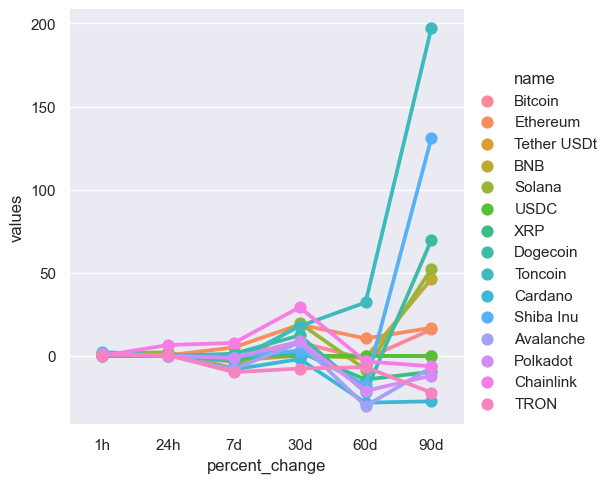

In [69]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [62]:
df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,68670.439120,2024-05-28 15:53:04.271957
15,Bitcoin,68670.439120,NaN
0,Bitcoin,68670.439120,2024-05-28 15:53:04.271957
15,Bitcoin,68670.439120,NaN
30,Bitcoin,68579.120397,NaN
0,Bitcoin,68670.439120,2024-05-28 15:53:04.271957
15,Bitcoin,68670.439120,NaN
30,Bitcoin,68670.439120,2024-05-28 15:53:04.271957
45,Bitcoin,68670.439120,NaN
60,Bitcoin,68579.120397,NaN
